# Homework 1

In [156]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Assume we implemented an algorithm that has complexity approximately $n log(n)$. How much faster is this implementation compared to one of complexity $n^2$?

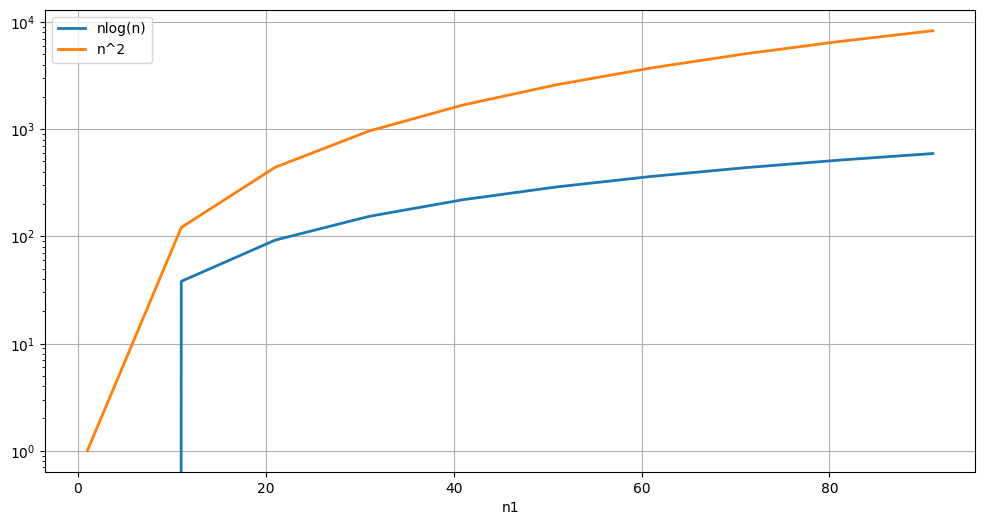

In [157]:
r = pd.DataFrame()#DEFINE THE DATA FRAME

#DEFINE THE X RANGE
r['n1'] = np.arange(1, 100, 10)

#DEFINE THE 2 FUNCTIONS TO SHOW
r['nlog(n)'] = np.arange(1, 100, 10) * np.log2(np.arange(1, 100, 10))
r['n^2'] = np.power(np.arange(1, 100, 10), 2)

#PLOT IN A GRAPH
r.plot(x='n1', logy=True, lw=2, figsize=(12, 6))
plt.grid()

### 2. The runtime of an algorithm is captured in the following table:

As precissely as possible, estimate the function that describes the growth of the runtime 

|$n$  | runtime -- $T(n)$|
|---- | ----- |
|1000|0.0|
|2000|0.02|
|4000|0.2|
|8000|0.6|
|16000|2.6|
|32000|10.4|
|64000|41.6|

In [158]:
#USING THE TABLE TRANSFORM IT INTO TWO LISTS
N = [1000,2000,4000,8000,16000,32000,64000]
T = [0.0,0.02,0.2,0.6,2.6,10.4,41.6]

#ZIP THE DATA INTO A DATAFRAME
df = pd.DataFrame(zip(N,T))
df.columns = ['n', 'T(n)']
df

,n,T(n)
0,1000,0.00
1,2000,0.02
2,4000,0.20
3,8000,0.60
4,16000,2.60
5,32000,10.40
6,64000,41.60


<AxesSubplot:title={'center':'y = 0.0006x-3.7895'}, xlabel='n'>

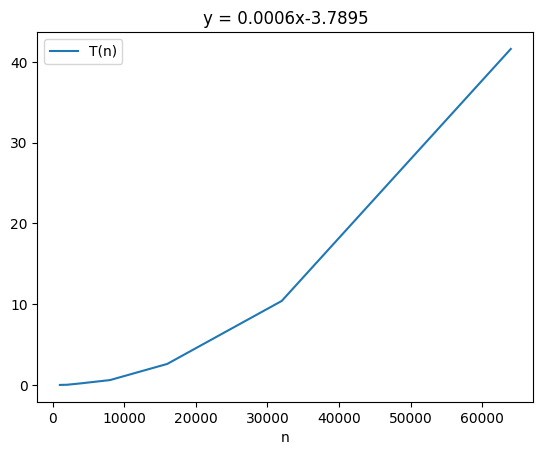

In [159]:
df.plot(x='n', y='T(n)',title = 'y = 0.0006x-3.7895') #USING EXCEL I GOT THE FUNCTION AND USED THE DATA FRAME TO PLOT IT

### 3. By estimating the number of operations as a function of $n$, estimate the complexity of the following function

```
def func1(n):                                   cost   time
    A = range(0,n)                              c1      n
    sum = 0                                     c2      1
    i = 0                                       c3      1
    for x in A[i:]:                             c4      n
        i += 1                                  c5      n
        for j in range(i, len(A)):              c6      n-1
            y = A[j]                            c7      n-1
            k = j                               c8      n-1
            while k < len(A):                   c9   \sum_{k=1}^n t_k
                z = A[k]                        c10  \sum_{k=1}^n (t_k-1)
                k = 2*k                         c11  \sum_{k=1}^n (t_k-1)
                if x + y <= z:                  c12  \sum_{k=1}^n (t_k-1)
                    sum += 1                    c13 \sum_{k=1}^n (t_k-1)
    return sum
```

### Total time

> $T(n) = c_1n + c_2(1) + c_3(1) +  c_4(n) + c_5(n) + c_6(n-1) + c_7(n-1) + c_8(n-1)+c_9 \sum_{k=1}^n t_k + c_10 \sum_{k=1}^n (t_k-1)+c_11 \sum_{k=1}^n (t_k-1)+c_12 \sum_{k=1}^n (t_k-1)+c_13 \sum_{k=1}^n (t_k-1)$

> $O(n^3)$


### 4. From class, remember the code we use to get the sum of the first $n$ positive integers:

```
def sum1(n):
    total = 0
    for i in range(1, n+1):
        total += i
    return total
```

Now consider a different function that does the same thing.

```
def sum2(n): 
    total = n*(n+1)//2
    return total
```

1. Run the two functions and make sure that they return the same outputs. Use $n = 5, 8, 103, 527$
2. Use Python time library to estimate the runtime for inputs of $n = [1, 10, 10^2, 10^3, 10^4, 10^5, 10^6, 10^7, 10^8, 10^9]$
3. Plot the runtime as a function of $n$ for both functions in the same figure. 
    - Use different line colors and markers to help distinguish between the two curves. 
4. Analytically estime the runtime functions for the functions `sum1` and `sum2`. Call them $T_1(n)$ and $T_2(n)$.
    - Note that the times obtained in your computer will be different to the ones shown in class since the speed and memory of the computers used to run the code are likely different
5. How long will it take to run the code for $n = 10^{100}$ using `sum1` and `sum2`? What are your main impressions about the difference?

**Hint:** Use and modify the code from the slides to get and plot the runtime


In [168]:
def sum1(n):
    start = 1000000*time.time()
    total = 0
    for i in range(1, n+1):
        total += i
    return 1000000*time.time() - start , total

def sum2(n):
    start = 1000000*time.time()
    total = n*(n+1)//2
    return 1000000*time.time() - start, total

In [170]:
N = [5, 8, 103,527]
results1 = [sum1(n) for n in N]
results2 = [sum2(n) for n in N]
print(results1)
print(results2)

listResults1 =[]
listResults2 =[]
for i in range(len(results1)):
    listResults1.append(results1[i][1])
    listResults2.append(results1[i][1])
print(listResults1)
print(listResults1)

dfResults1 = pd.DataFrame(zip(N, listResults1))
dfResults1.columns = ['N', 'T(N)']
dfResults2 = pd.DataFrame(zip(N, listResults2))
dfResults2.columns = ['N', 'T(N)']


[(6.0, 15), (2.0, 36), (15.0, 5356), (79.75, 139128)]
[(2.5, 15), (1.0, 36), (1.0, 5356), (1.0, 139128)]
[15, 36, 5356, 139128]
[15, 36, 5356, 139128]


In [171]:
dfResults1

,N,T(N)
0,5,15
1,8,36
2,103,5356
3,527,139128


In [172]:
dfResults2

,N,T(N)
0,5,15
1,8,36
2,103,5356
3,527,139128


# THE TWO FUNCTIONS RETURN THE SAME OUTPUT

In [180]:
ntimes = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000,100000000,1000000000]
run_time1 = [sum1(n) for n in ntimes]
run_time2 = [sum2(n) for n in ntimes]

In [181]:
time1 = []
time2 = []
for i in range(len(run_time1)):
    time1.append(run_time1[i][0])
    time2.append(run_time2[i][0])


In [182]:
df1 = pd.DataFrame(zip(ntimes, time1))
df1.columns = ['N', 'T(N)']
df1

,N,T(N)
0,1,6.000000e+00
1,10,3.000000e+00
2,100,1.500000e+01
3,1000,1.652500e+02
4,10000,2.612000e+03
5,100000,1.893100e+04
6,1000000,1.352980e+05
7,10000000,2.013622e+06
8,100000000,1.150292e+07
9,1000000000,1.026927e+08


In [184]:
df2 = pd.DataFrame(zip(ntimes, time2))
df2.columns = ['N', 'T(N)']
df2

,N,T(N)
0,1,2.00
1,10,1.25
2,100,0.00
3,1000,0.00
4,10000,1.25
5,100000,1.00
6,1000000,1.00
7,10000000,0.00
8,100000000,0.00
9,1000000000,1.25


<AxesSubplot:xlabel='N'>

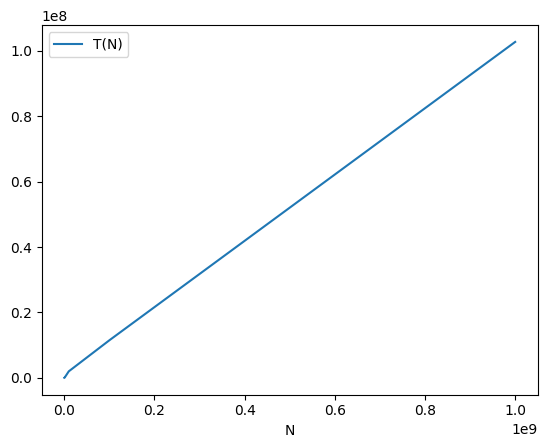

In [186]:
df1.plot(x='N', y='T(N)')

<AxesSubplot:xlabel='N'>

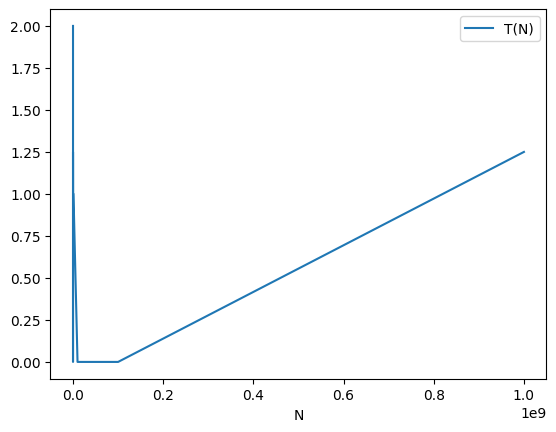

In [187]:
df2.plot(x='N', y='T(N)')

# FOR SUM1() WE HAVE A
> $O(n)$

> $y=6x10^6x - 2x10^7 = 6x10^{106} ;  x = 10^{100}$

# FOR SUM2() WE HAVE A
> $O(1)$

> $y= 7x10^{-9}x + 1.2 = 7x10^{91}; x=10^{100}$


### 5. Prove that the running time of an algorithm is $\Theta(g(n))$ if and only if its worst-case running time is $O(g(n))$ and its best-case running time is $\Omega(g(n))$

### 6.  Sort the following functions in decreasing order of asymptotic complexity ($O(f(n))$):

- $f_1(n) = \sqrt{n}$
- $f_2(n) = n^3$
- $f_3(n) = {n\choose 4}$
- $f_4(n) = \sum_{i=2}^n (i-1)$

### 7. Implement the methods of the class `Array` that deal with deletion of elements. Consider the 3 cases we considered in class.